# Artificial Intelligence: Reinforcement Learning In Python

## Section 3: Return of the Multi-Armed Bandit

### Comparing Epsilons

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Bandit:
    def __init__(self, m):
        self.m = m
        self.mean = 0
        self.N = 0
    
    def pull(self):
        return np.random.randn() + self.m
    
    def update(self, x): 
        self.N += 1
        self.mean = (1 - 1.0/self.N) * self.mean + 1.0/self.N * x
        
def run_experiment(m1, m2, m3, eps, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    data = np.empty(N)
    
    for i in range(N):
        p = np.random.random()
        if p < eps: 
            j = np.random.choice(3)
        else:
            j = np.argmax([x.mean for x in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        
        #plotting:
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    
    return cumulative_average
        

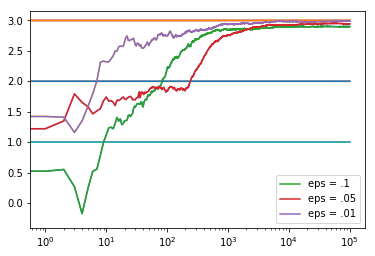

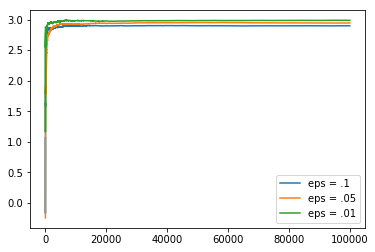

In [3]:

c_1 = run_experiment(1.0, 2.0, 3.0, .1, 100000)
c_2 = run_experiment(1.0, 2.0, 3.0, .05, 100000)
c_3 = run_experiment(1.0, 2.0, 3.0, .01, 100000)

#Log scale plot
plt.plot(c_1, label='eps = .1')
plt.plot(c_2, label='eps = .05')
plt.plot(c_3, label='eps = .01')
plt.legend()
plt.xscale('log')
plt.show()

#linear plot
plt.plot(c_1, label='eps = .1')
plt.plot(c_2, label='eps = .05')
plt.plot(c_3, label='eps = .01')
plt.legend()
plt.xscale('linear')
plt.show()


### Optimistic Initial Value

By choosing an optimistic initial value such as 10, when we know the true value to be much less, we can omit epsilon-greedy check because the argmax selector will always explore the unexplored bandits the most since they have yet to be brought down to their more realistic values. 

In [4]:
class Bandit_opt:
    def __init__(self, m, upper_limit):
        self.m = m
        self.mean = upper_limit
        self.N = 0
    
    def pull(self):
        return np.random.randn() + self.m
    
    def update(self, x): 
        self.N += 1
        self.mean = (1 - 1.0/self.N) * self.mean + 1.0/self.N * x
        
def run_experiment_opt(m1, m2, m3, N, upper_limit):
    bandits = [Bandit_opt(m1, upper_limit), Bandit_opt(m2, upper_limit), Bandit_opt(m3, upper_limit)]
    data = np.empty(N)
    
    for i in range(N):
        j = np.argmax([x.mean for x in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        
        #plotting:
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    
    return cumulative_average
        

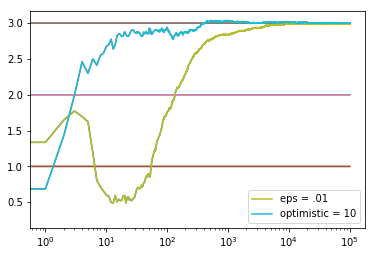

In [41]:
c_1 = run_experiment(1.0, 2.0, 3.0, .01, 100000)
c_2 = run_experiment_opt(1.0, 2.0, 3.0, 100000, 10.0)

#Log scale plot
plt.plot(c_1, label='eps = .01')
plt.plot(c_2, label='optimistic = 10')
plt.legend()
plt.xscale('log')
plt.show()

The optimistic values converged much more quickly because it automatically reduced the number of times that it explores sub optimal bandits

### UCB1

We use the Upper Confidence Bound $UCB_j$ by greedily choosing the largest one each time. From the equation $X_{UCB_j} = \bar{X_j} + \sqrt{2\frac{\ln N}{N_j}}$ we can intuit that the ratio between N and $N_j$ will determine the upper bound. Specifically, as N_j increases, the upper bound will decrease.

In [47]:
import math
class Bandit_ucb:
    
    def __init__(self, m):
        self.mean = 0
        self.m = m
        self.N = 0

    def pull(self):
        return np.random.randn() + self.m
    
    def update(self, x): 
        self.N += 1
        self.mean = (1 - 1.0/self.N) * self.mean + 1.0/self.N * x 

def run_experiement_ucb(m1, m2, m3, N):
    bandits = [Bandit_ucb(m1), Bandit_ucb(m2), Bandit_ucb(m3)]
    data = np.empty(N)
    
    for i in range(N):
        j = np.argmax([b.mean + math.sqrt(2*np.log(N)/(b.N)) for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        
        #plotting:
        data[i] = x
    
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    return cumulative_average

/home/tomas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars


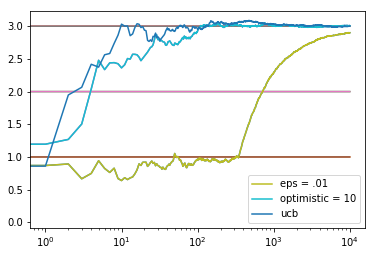

In [49]:
c_1 = run_experiment(1.0, 2.0, 3.0, .01, 10000)
c_2 = run_experiment_opt(1.0, 2.0, 3.0, 10000, 10.0)
c_3 = run_experiement_ucb(1.0, 2.0, 3.0, 10000)

#Log scale plot
plt.plot(c_1, label='eps = .01')
plt.plot(c_2, label='optimistic = 10')
plt.plot(c_3, label="ucb")
plt.legend()
plt.xscale('log')
plt.show()

It's hard to tell whether UCB or optimistic values outperform each other. however UCB has the advantage that we don't need to assume optimistic values.